In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


## Import data 

In [23]:
dlit=pd.read_excel("API_SE.ADT.LITR.ZS_DS2_en_excel_v2_5995143.xls",header=3)
dlit['Literacy']=dlit['2022']
dlit=dlit[['Country Name','Country Code','Literacy']]
dlit.head()

,Country Name,Country Code,Literacy
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,72.600403
2,Afghanistan,AFG,NaN
3,Africa Western and Central,AFW,60.312698
4,Angola,AGO,72.400002


In [24]:
# Import metadata to relate Country name to Income group
df_countries=pd.read_excel("API_NY.GDP.PCAP.CD_DS2_en_excel_v2_5871574.xls",sheet_name='Metadata - Countries')
df_countries.head(3)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan


## Data Analysis

In [25]:
# Mean of literacy rate by income level
df_litc=pd.merge(dlit,df_countries[['Country Code','IncomeGroup']])
df_litc2=pd.DataFrame(df_litc.groupby(['IncomeGroup'])['Literacy'].mean())
df_litc2=df_litc2.sort_values('Literacy')
df_litc2

,Literacy
IncomeGroup,
Low income,57.027917
Lower middle income,79.183302
Upper middle income,93.809139
High income,95.703617


In [26]:
# maximum of literacy rate by income level
dfmax=pd.DataFrame(df_litc.groupby(['IncomeGroup'])['Literacy'].max())
dff=pd.merge(df_litc2,dfmax, left_index=True, right_index=True)
dff.columns=['Mean','Max']
dff


,Mean,Max
IncomeGroup,,
Low income,57.027917,80.589996
Lower middle income,79.183302,99.999977
Upper middle income,93.809139,99.574989
High income,95.703617,98.285408


In [27]:
# rename index values
dff.index=['Low income', 'Lower middle\n income', 'Upper middle\n income',
       'High income']

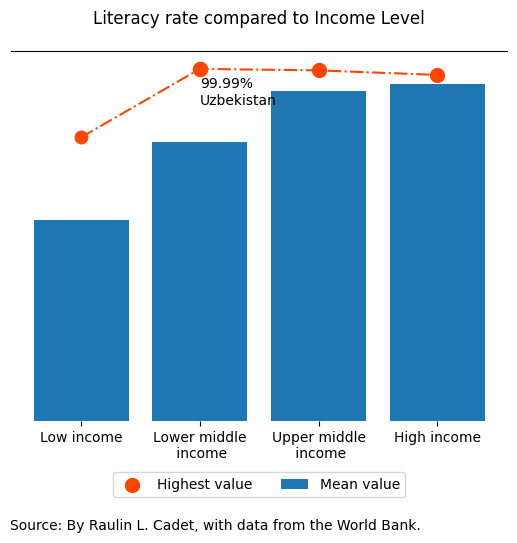

In [28]:
fig=plt.subplot()
plt.bar(dff.index,dff.Mean,label='Mean value')

for i in range(dff.shape[0]):
    if dff.Max[i]==np.max(dff.Max):
        plt.scatter(dff.index[i],dff.Max[i],color='orangered',s=dff.Max[i],label='Highest value')

    plt.scatter(dff.index[i],dff.Max[i],color='orangered',s=dff.Max[i])
plt.plot(dff.index,dff.Max,linestyle='-.',color='orangered')
fig.spines[['right','bottom','left']].set_visible(False)
fig.set_yticks([])  # Remove y-axis ticks
plt.text(dff.index[1],np.max(dff.Max)-10,s='99.99%\nUzbekistan')
plt.title('Literacy rate compared to Income Level',pad=20)
plt.text(-0.6,-31,s='Source: By Raulin L. Cadet, with data from the World Bank.')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)